# Processing audio

In [23]:
from scipy.io import wavfile
from matplotlib.pyplot import specgram
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Carregando audio

In [40]:
fs, data = wavfile.read('./assets/sound2.wav')

(array([[  5.34391240e+05,   1.29007077e+06,   1.03602235e+06, ...,
           3.50081399e+05,   5.33901948e+05,   1.40733333e+06],
        [  6.80999907e+05,   6.53537550e+05,   7.53123082e+05, ...,
           2.52445265e+05,   2.57554731e+05,   9.03404997e+05],
        [  4.67800470e+04,   2.90646044e+03,   3.24218149e+04, ...,
           1.31627945e+04,   1.54043094e+04,   1.07653804e+04],
        ..., 
        [  2.52659823e+03,   3.65257790e+03,   1.92090481e+03, ...,
           3.84336964e+03,   1.38485962e+03,   1.05926892e+03],
        [  8.70668441e+04,   7.68631477e+04,   9.22494465e+03, ...,
           8.65914925e+03,   4.17882430e+04,   2.81098853e+04],
        [  9.47569477e+04,   9.08053096e+04,   1.60335677e+04, ...,
           2.11811795e+04,   6.49683252e+04,   4.57647524e+04]]),
 array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
           9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
          18.,   19.,   20.,   21.,   22.,   23., 

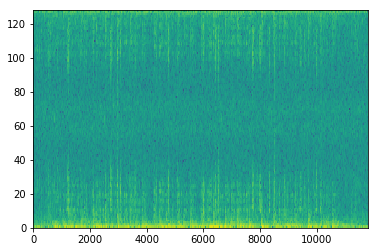

In [41]:
specgram(data.flatten(), NFFT=256, Fs=256)

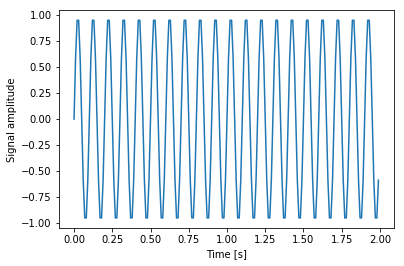

In [42]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')

(-5, 110)

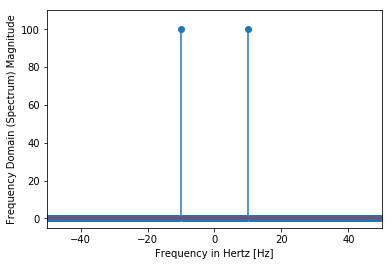

In [43]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

## Simulando audio mono

In [44]:
audio = np.mean(data, axis=1)

Audio length: 31.50 seconds


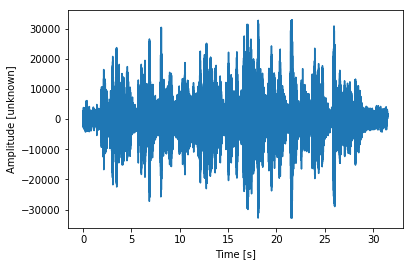

In [45]:
N = audio.shape[0]
L = N / fs

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / fs, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]')

In [46]:
from skimage import util

M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (1512000,), Sliced audio shape: (15110, 1024)


## Aplicando janela de hanning

In [47]:
win = np.hanning(M + 1)[:-1]
slices = slices * win


In [48]:
slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 15110)


In [49]:
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

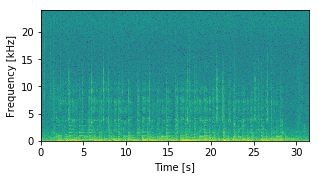

In [50]:
f, ax = plt.subplots(figsize=(4.8, 2.4))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, fs / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

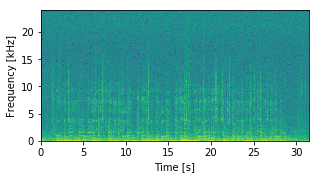

In [51]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(audio, fs=fs, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');